In [296]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [297]:
df = pd.read_csv('./diabetes.csv')
df.shape

(768, 9)

In [298]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [299]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [300]:
df.duplicated().sum()

0

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [302]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [303]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [304]:
#It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values
diabetes_data_copy = df.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


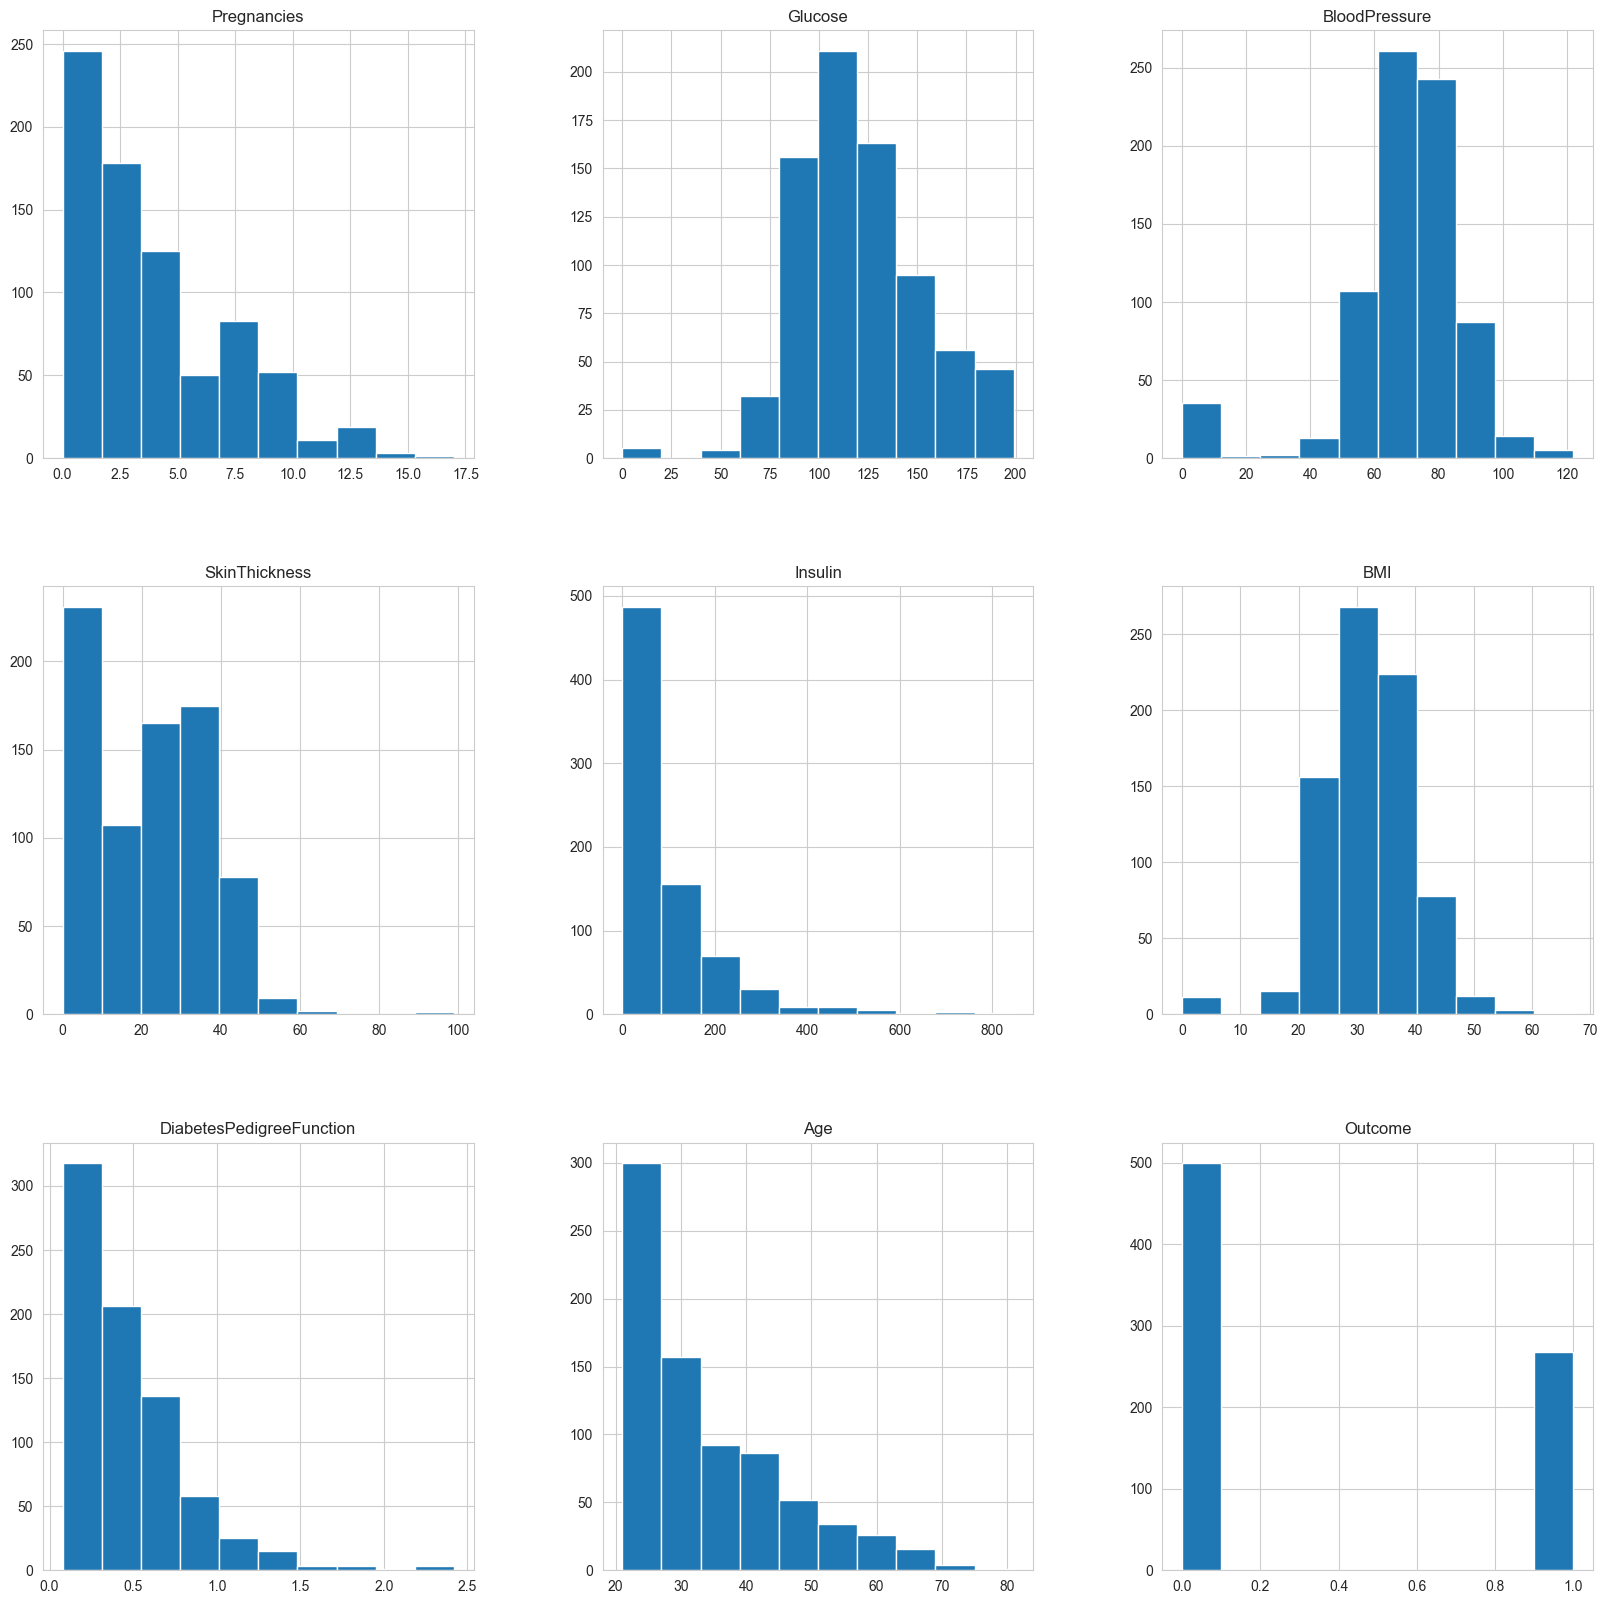

In [305]:
p = df.hist(figsize = (20,20))

In [306]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

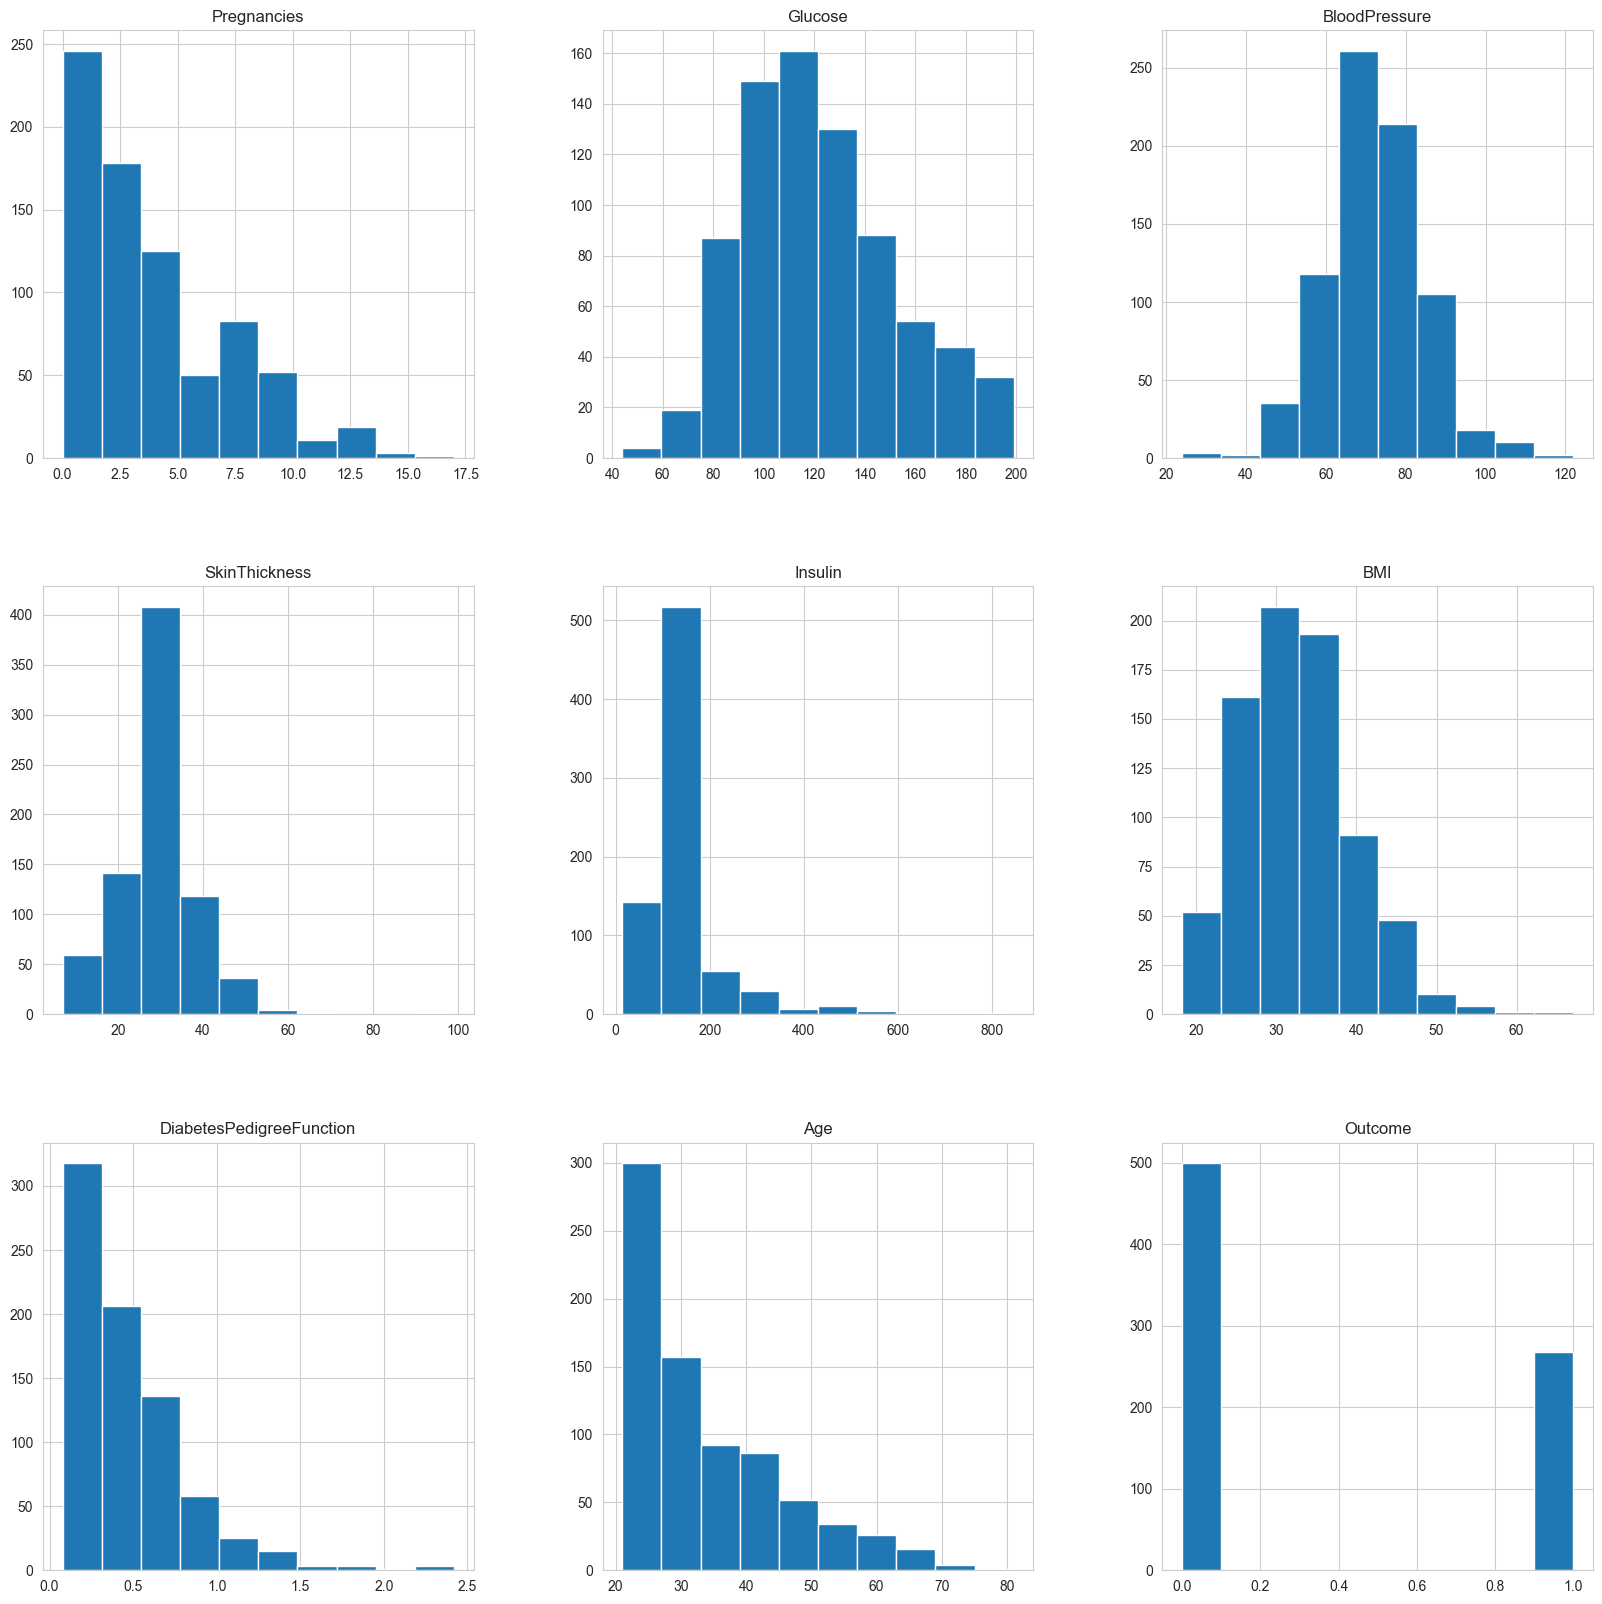

In [307]:
p = diabetes_data_copy.hist(figsize = (20,20))

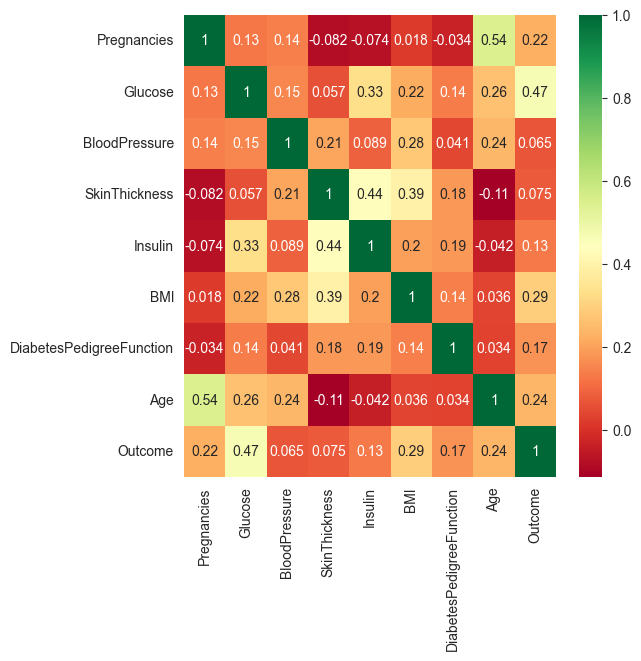

In [308]:
plt.figure(figsize=(6,6))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

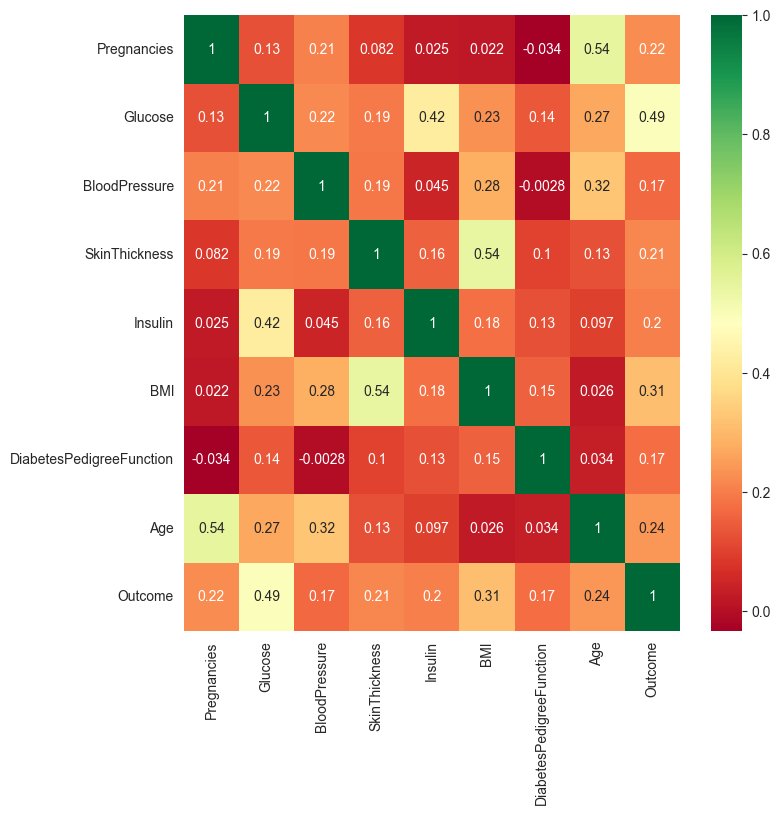

In [309]:
plt.figure(figsize=(8,8))
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')

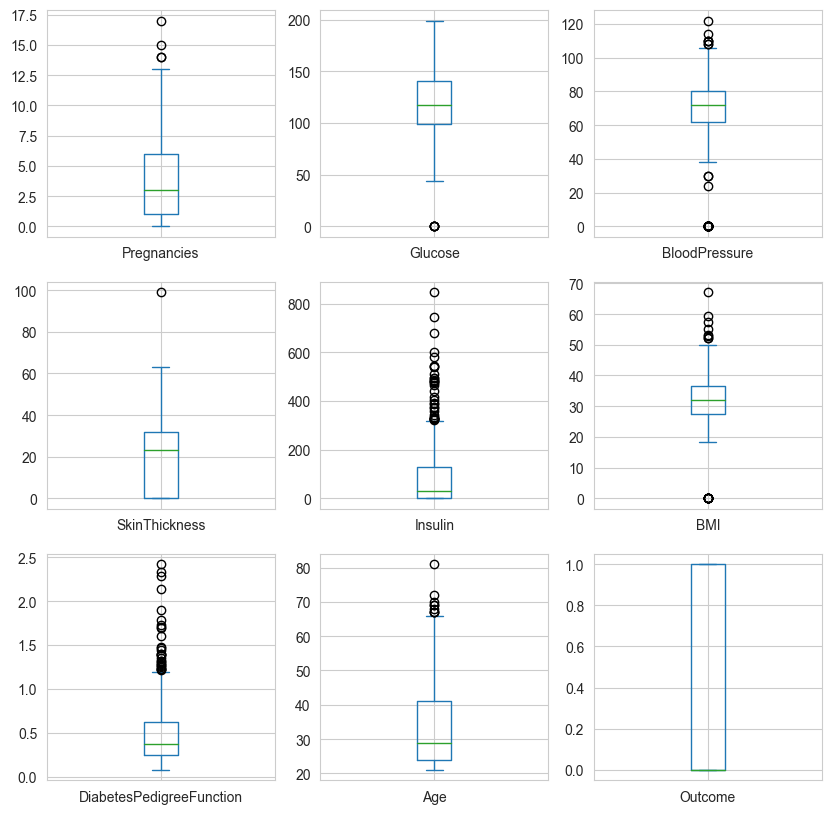

In [310]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False ,figsize =(10,10))
plt.show()     

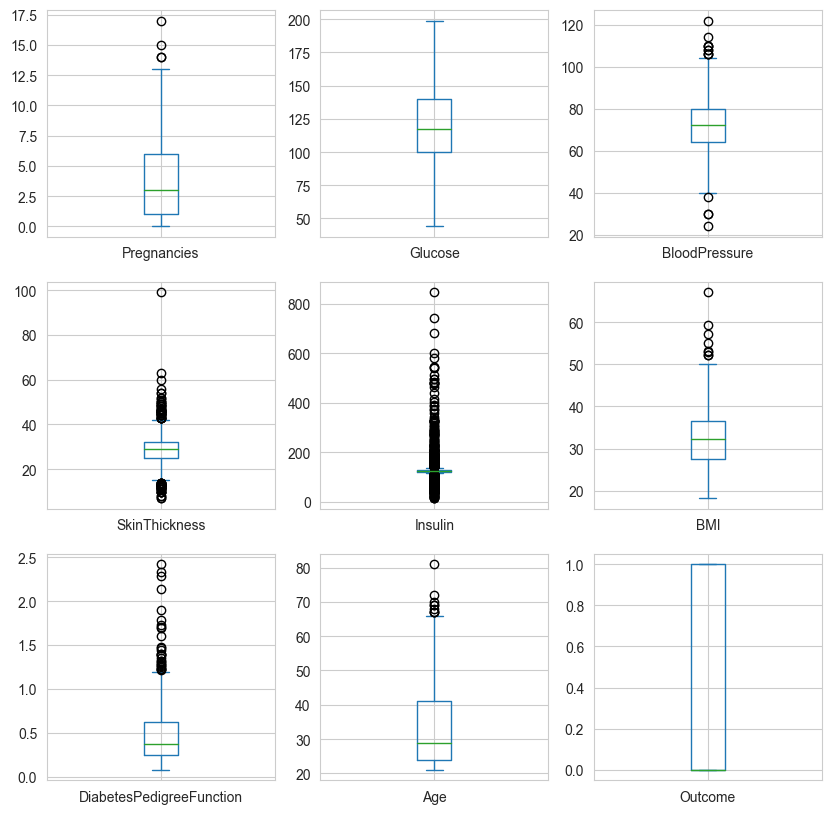

In [311]:
diabetes_data_copy.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False ,figsize =(10,10))
plt.show()  

In [312]:
x = diabetes_data_copy.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

In [313]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [314]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [315]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=42, stratify=y)

In [316]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [317]:
X_train

array([[-0.85857046, -0.0395586 ,  0.62698479, ...,  0.92173779,
         2.0175701 ,  0.66924232],
       [ 1.23470609, -1.5667586 , -0.18954055, ...,  0.39088318,
         0.66845268,  0.49609827],
       [ 0.63662707,  0.4252414 , -0.18954055, ...,  0.40562914,
         0.18725762, -0.36962196],
       ...,
       [ 2.43086411, -0.9691586 , -0.84276082, ..., -0.74455585,
         1.32087051,  0.92895838],
       [-1.15760996,  1.91924141, -1.82259123, ...,  0.75953222,
        -0.06957655, -0.97562612],
       [ 0.03854806,  0.75724141, -1.16937096, ..., -0.46438258,
        -0.56553219,  0.32295423]])

In [318]:
X_test

array([[ 0.33758757, -1.1019586 , -0.51615068, ..., -1.21642661,
        -0.40316576, -0.28304993],
       [ 0.93566658, -0.2387586 , -0.51615068, ...,  0.02223414,
        -0.65114358,  0.75581434],
       [ 0.93566658, -0.2387586 , -0.67945575, ..., -0.77404777,
         0.74815983,  0.06323816],
       ...,
       [ 3.32798263,  0.4916414 , -0.18954055, ...,  0.65631049,
        -0.96111586,  0.84238636],
       [-0.55953095, -0.6703586 , -1.16937096, ..., -1.24591854,
         0.39981004, -0.88905409],
       [-0.85857046, -1.0687586 ,  0.30037466, ..., -0.21370124,
        -0.8459833 , -0.88905409]])

In [319]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [320]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[140  27]
 [ 42  47]]


Accuracy of Logistic Regression: 73.046875 

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       167
           1       0.64      0.53      0.58        89

    accuracy                           0.73       256
   macro avg       0.70      0.68      0.69       256
weighted avg       0.72      0.73      0.72       256



In [321]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[131  36]
 [ 35  54]]


Accuracy of Naive Bayes model: 72.265625 

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       167
           1       0.60      0.61      0.60        89

    accuracy                           0.72       256
   macro avg       0.69      0.70      0.70       256
weighted avg       0.72      0.72      0.72       256



In [322]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[140  27]
 [ 46  43]]


Accuracy of Random Forest: 71.484375 

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       167
           1       0.61      0.48      0.54        89

    accuracy                           0.71       256
   macro avg       0.68      0.66      0.67       256
weighted avg       0.70      0.71      0.71       256



In [323]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[152  15]
 [ 56  33]]


Accuracy of Extreme Gradient Boost: 72.265625 

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       167
           1       0.69      0.37      0.48        89

    accuracy                           0.72       256
   macro avg       0.71      0.64      0.65       256
weighted avg       0.72      0.72      0.70       256



In [324]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[144  23]
 [ 47  42]]


Accuracy of K-NeighborsClassifier: 72.65625 

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       167
           1       0.65      0.47      0.55        89

    accuracy                           0.73       256
   macro avg       0.70      0.67      0.67       256
weighted avg       0.72      0.73      0.71       256



In [325]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[145  22]
 [ 44  45]]


Accuracy of DecisionTreeClassifier: 74.21875 

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       167
           1       0.67      0.51      0.58        89

    accuracy                           0.74       256
   macro avg       0.72      0.69      0.70       256
weighted avg       0.73      0.74      0.73       256



In [326]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[143  24]
 [ 43  46]]


Accuracy of Support Vector Classifier: 73.828125 

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       167
           1       0.66      0.52      0.58        89

    accuracy                           0.74       256
   macro avg       0.71      0.69      0.69       256
weighted avg       0.73      0.74      0.73       256



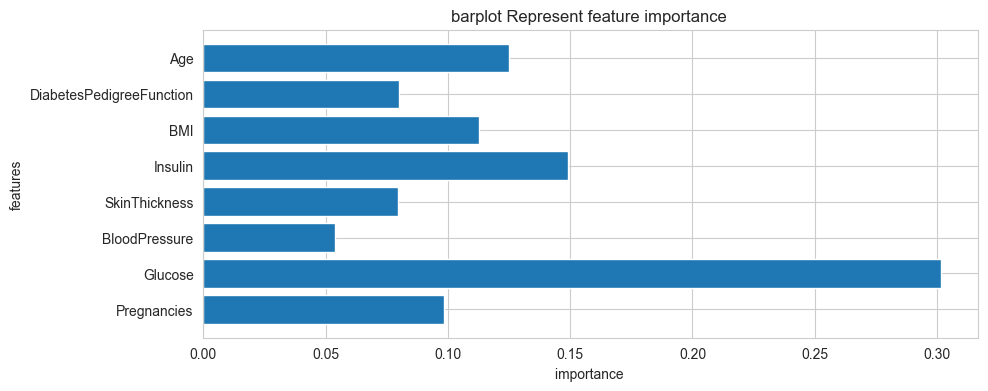

In [327]:
imp_feature = pd.DataFrame({'Feature': ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

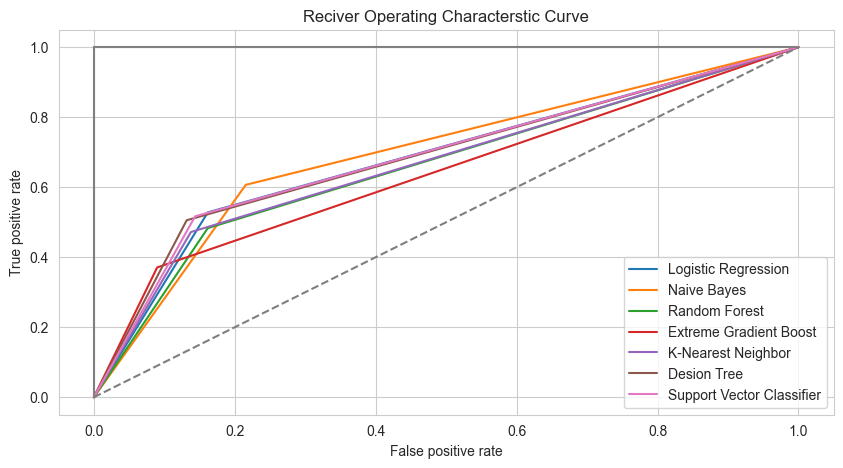

In [328]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [329]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,73.046875
1,Naive Bayes,72.265625
2,Random Forest,71.484375
3,Extreme Gradient Boost,72.265625
4,K-Nearest Neighbour,72.656250
5,Decision Tree,74.218750
6,Support Vector Machine,73.828125


In [330]:
scv=StackingCVClassifier(classifiers=[dt,lr,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[140  27]
 [ 42  47]]


Accuracy of StackingCVClassifier: 73.046875 

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       167
           1       0.64      0.53      0.58        89

    accuracy                           0.73       256
   macro avg       0.70      0.68      0.69       256
weighted avg       0.72      0.73      0.72       256



In [331]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[143  24]
 [ 43  46]]


Accuracy of Support Vector Classifier: 73.828125 

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       167
           1       0.66      0.52      0.58        89

    accuracy                           0.74       256
   macro avg       0.71      0.69      0.69       256
weighted avg       0.73      0.74      0.73       256



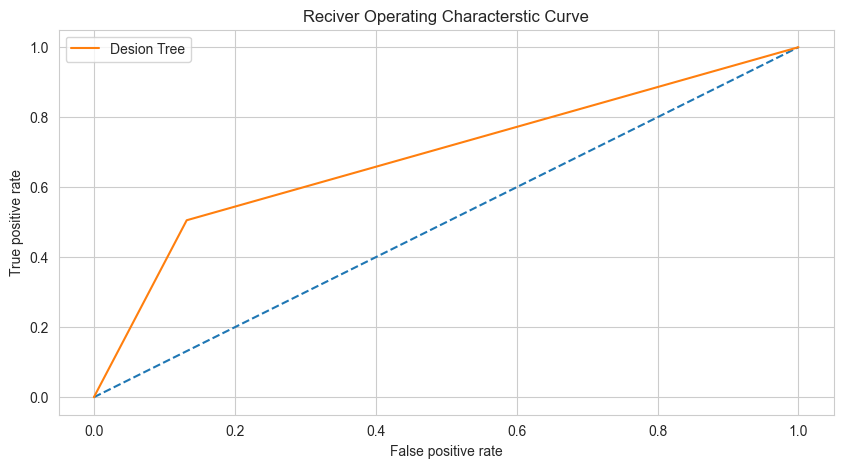

In [332]:
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.plot([0,1],ls='--')
plt.title('Reciver Operating Characterstic Curve')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [333]:
import pickle
pickle.dump(svc, open('svc_model.pkl', 'wb'))

In [334]:
pickle_in = open("svc_model.pkl","rb")
classifier=pickle.load(pickle_in)

In [335]:
data = sc.transform([[1,85,66,29,0,26.6,0.351,31]])

C:\Ana\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [336]:
prediction = classifier.predict(data)

In [337]:
prediction

array([0], dtype=int64)

In [338]:
[[1,85,66,29,0,26.6,0.351,31]]

[[1, 85, 66, 29, 0, 26.6, 0.351, 31]]

In [339]:
[[6,148,72,35,0,33.6,0.627,50]]

[[6, 148, 72, 35, 0, 33.6, 0.627, 50]]